In [3]:
import os
import numpy
import cv2
import matplotlib
from PIL import Image
from tensorflow import keras
import tensorflow
from keras.layers import Input, Conv2D, Conv2DTranspose, Concatenate, LeakyReLU, BatchNormalization, Activation, Dropout
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.python.client import device_lib
import matplotlib.pyplot


In [2]:
# width = 1640
width_standard= 1640
height_standard = 590
width = 512
height = 128

In [104]:
fileTrain = "./DataTrain"
fileVal = "./DataVal"
fileSaveTrain = "./DataClean/Train"
fileSaveVal = "./DataClean/Val"
fileSave = "./DataClean"

In [105]:
def regon_of_interest(image):
    polygons = numpy.array([[(0, height_standard), (0, 300), (700, 240), (850, 240), (width_standard, 300), (width_standard, height_standard)]])
    mask = numpy.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    mask = cv2.bitwise_and(image, mask)
    return mask


In [106]:
def crop_image(image):
    return numpy.array(Image.fromarray(image).crop((0, 240, width_standard, height_standard)))


In [107]:
x = 0
y = 0

0


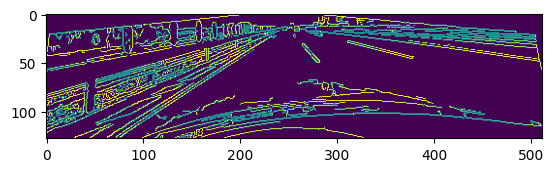

./DataClean/Train/Y/0.jpg
[[240.573, 590.0], [257.848, 580.0], [275.127, 570.0], [292.409, 560.0], [309.699, 550.0], [327.126, 540.0], [344.433, 530.0], [361.753, 520.0], [379.085, 510.0], [396.56, 500.0], [413.925, 490.0], [431.309, 480.0], [448.714, 470.0], [467.012, 460.0], [484.586, 450.0], [502.935, 440.0], [520.431, 430.0], [538.821, 420.0], [557.229, 410.0], [575.653, 400.0], [593.868, 390.0], [612.315, 380.0], [630.77, 370.0], [649.232, 360.0], [667.698, 350.0], [686.165, 340.0], [704.416, 330.0], [722.879, 320.0], [741.337, 310.0], [759.788, 300.0], [778.228, 290.0]]
[[[240.573, 590.0], [257.848, 580.0]], [[257.848, 580.0], [275.127, 570.0]], [[275.127, 570.0], [292.409, 560.0]], [[292.409, 560.0], [309.699, 550.0]], [[309.699, 550.0], [327.126, 540.0]], [[327.126, 540.0], [344.433, 530.0]], [[344.433, 530.0], [361.753, 520.0]], [[361.753, 520.0], [379.085, 510.0]], [[379.085, 510.0], [396.56, 500.0]], [[396.56, 500.0], [413.925, 490.0]], [[413.925, 490.0], [431.309, 480.0]], 

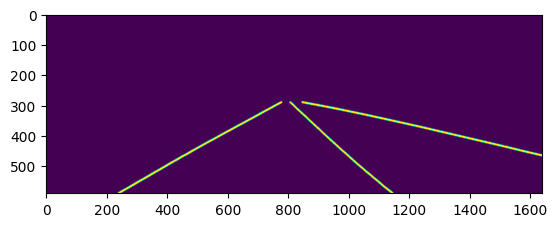

In [108]:
def read_data_file(path, fileSave):
    global x, y
    for file in os.listdir(path):
        file_name = os.path.join(path, file)
        # print(file_name)
        if (".jpg" in file):
            if (not (x == y or x + 1 == y)): 
                break
            print(x)
            file_save_train_name = fileSave + "/X/" + str(x) + ".jpg"
            img = numpy.array(Image.open(file_name))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = regon_of_interest(img)
            img = crop_image(img)
            img = cv2.GaussianBlur(src=img, ksize=(5, 5), sigmaX=0, sigmaY=0)
            img = cv2.resize(img, (width, height))
            img = cv2.Canny(img, 50, 150)
            img = img / 255.0
            # cv2.imwrite(file_save_train_name, img)
            x = x + 1
            # images_train.append(img)
            matplotlib.pyplot.imshow(img)
            matplotlib.pyplot.show()
        if (".txt" in file):
            with open(file_name, 'r') as f:
                if (not (x == y or x == y + 1)): 
                    break
                file_save_name = fileSave + "/Y/" + str(y) + ".jpg"
                print(file_save_name)
                label_x =[]
                labels = f.read()
                labels = labels.split('\n')
                if (labels[-1] == ''): labels.pop()
                labels = [[word] for word in labels]
                length = len(labels)
                for i in range(0, length, 1):
                    numbers = [float(num) for num in labels[i][0].split()]
                    sub_arrays = [numbers[i:i+2] for i in range(0, len(numbers), 2)]
                    labels[i][0] = sub_arrays
                    # print(labels[i][0])
                line_image = numpy.zeros((height_standard, width_standard))
                # for i in labels:
                #     for j in i:
                #         for z in j:
                #             cv2.circle(line_image,  tuple(map(int, z)), radius = 5, color = (255, 255, 255), thickness=-1)
                for i in labels:
                    for j in i:
                        # print(j)
                        j = [[j[t], j[t+1]] for t in range(len(j)-1)]
                        # print(j)
                        for z in j:
                            cv2.line(line_image, tuple(map(int, z[0])), tuple(map(int, z[1])), color = (255, 255, 255), thickness=5)
                matplotlib.pyplot.imshow(line_image)
                matplotlib.pyplot.show()
                line_image = crop_image(line_image)
                line_image = cv2.resize(line_image, (width, height))
                line_image = line_image / 255.0
                # cv2.imwrite(file_save_name, line_image)
                y = y + 1
                break
                # print(line_image)
for file in os.listdir(fileTrain):
    file_name = os.path.join(fileTrain, file)
    read_data_file(file_name, fileSaveTrain)
    break

1


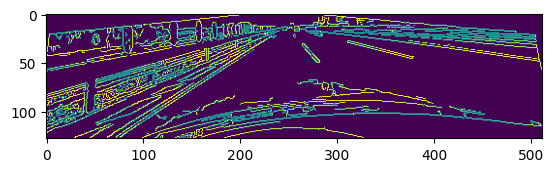

./DataClean/Train/Y/1.jpg
[[240.573, 590.0], [257.848, 580.0], [275.127, 570.0], [292.409, 560.0], [309.699, 550.0], [327.126, 540.0], [344.433, 530.0], [361.753, 520.0], [379.085, 510.0], [396.56, 500.0], [413.925, 490.0], [431.309, 480.0], [448.714, 470.0], [467.012, 460.0], [484.586, 450.0], [502.935, 440.0], [520.431, 430.0], [538.821, 420.0], [557.229, 410.0], [575.653, 400.0], [593.868, 390.0], [612.315, 380.0], [630.77, 370.0], [649.232, 360.0], [667.698, 350.0], [686.165, 340.0], [704.416, 330.0], [722.879, 320.0], [741.337, 310.0], [759.788, 300.0], [778.228, 290.0]]
[[[240.573, 590.0], [257.848, 580.0]], [[257.848, 580.0], [275.127, 570.0]], [[275.127, 570.0], [292.409, 560.0]], [[292.409, 560.0], [309.699, 550.0]], [[309.699, 550.0], [327.126, 540.0]], [[327.126, 540.0], [344.433, 530.0]], [[344.433, 530.0], [361.753, 520.0]], [[361.753, 520.0], [379.085, 510.0]], [[379.085, 510.0], [396.56, 500.0]], [[396.56, 500.0], [413.925, 490.0]], [[413.925, 490.0], [431.309, 480.0]], 

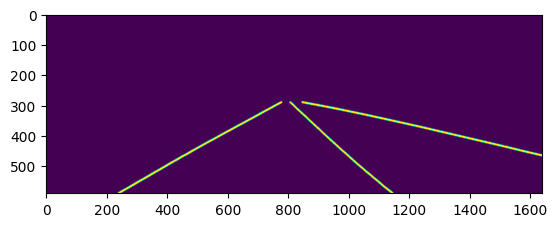

In [109]:
for file in os.listdir(fileTrain):
    file_name = os.path.join(fileTrain, file)
    read_data_file(file_name, fileSaveTrain)
    break

In [110]:

# for file in os.listdir(fileVal):
#     file_name = os.path.join(fileVal, file)
#     read_data_file(file_name, fileSaveVal)
#     break